# **07 큐**

## **07-1 큐의 개념** 

큐는 먼저 들어간 데이터가 먼저 나오는 자료구조다. **<span style="color:yellow">이런 큐의 특징을 선입선출 또는 FIFO라고 한다. 그리고 스택과 마찬가지로 큐도 삽인하는 연산을 push 꺼내는 연산을 pop이라고 한다. </span>**

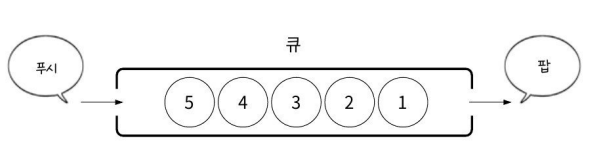

### **큐의 특성을 활용하는 분야**

먼저 들어온 것을 먼저 처리하는 큐의 동작 방식은 프로그래밍 언어에서 많이 활용되고 있다. 대표적으로는 여러 이벤트가 발생했을 떄 발생한 순서대로 처리할 떄 큐가 활용된다. 예를 들어 영화관에서 줄을 서는 사람들을 처리해야 할 때 먼저 줄을 선 사람을 먼저 처리하는 것이 그 예다. 

- 작업 대기열 : 네트워크 통신을 할 때 다수의 클라이언트에서 서버의 작업을 요청하면 서버는 요청이 들어온 순서대로 작업을 처리할 때 
- 이벤트 처리 : 어떤 애플리케이션이나 시스템에서 사용자의 이벤트, 예를 들어 키보드 입력이나 마우스 움직임을 처리할 때

### **큐의ADT**

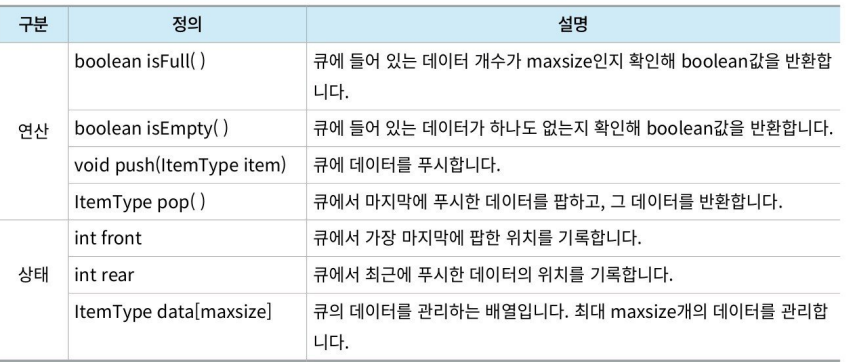 

### **큐의 새부 동작에 대해 조금 더 자세히 알아보기**

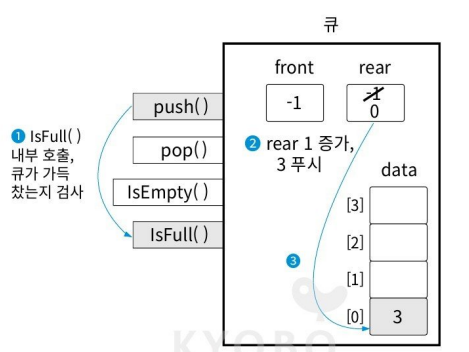   
1. 현재 큐가 가득 찼는지 확인하고 큐가 가득 차지 않았으므로 rear가 가리키는 위치에 3을 push하는 모습이다
2. rear를 +1한 다음 rear가 가리키는 위치에 3을 push하는 모습이다.

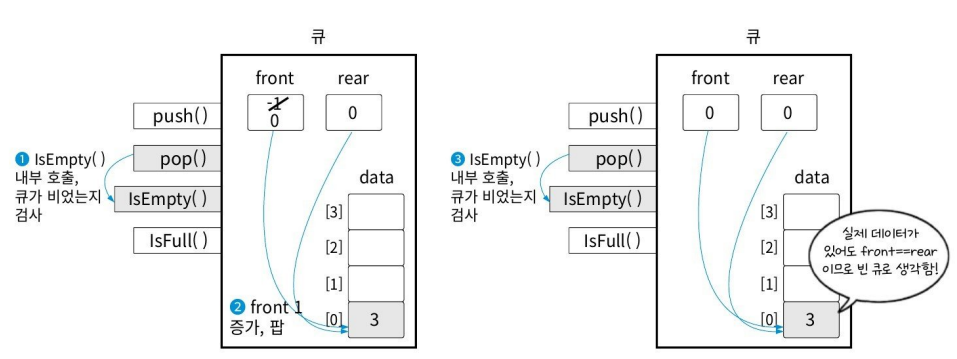  

이 상태에서 pop을 하면 어떻게 될까?  우선 isEmpty()를 연산을 통해 큐가 비었는지 확인한다.  isEmpty()연산은 front,rear의 값이 같은지 확인해서 큐에 원소가 없는데 pop하는 동작을 방지한다. 만약 비어 있지 않다면 front를 +1 한다. 이렇게 하면 front,rear가 0으로 같아지므로 isEmpty()연산시 큐가 빈 것으로 처리되어 실제 배열의 데이터를 삭제하지 않고도 데이터를 삭제한 것처럼 관리할 수 있다.

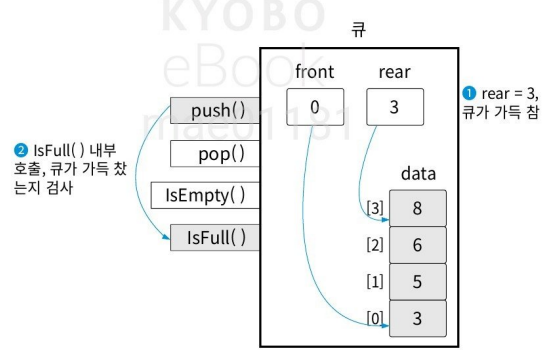  

이제 큐가 가득 찼을 떄 push하면 어찌 되는지 보자. rear가 3이므로 maximize-1과 같다 다시말해 isFull()연산은 True이므로 push하지 못한다. 마지막 push에서 실제 data에 저장한 데이터는 3,5,6,8로 4개지만 큐는5,6,8로 3개이다. **<span style="color:yellow">다시 말해 큐는 fornt의 다음부터 reaar까지를 큐가 관리하는 데이터로 생각해야 한다. </span>**
하지만 실제 data의 공간은 4개인데 큐가 관리하는 데이터는 3개이므로 실질적으로는 메모리 공간을 낭비한 상황이다. 이렇게 된 이유는 큐를 한방향으로 관리하고 있기 떄문이다. 이렇게 하면 front 이전의 공간을 활용하지 못한다. front이전을 기준으로 큐의 사용할 수 있는 부분과 사용할수 없는 부분이 나뉘었다.

#### **큐를 원형으로 개선하기**


이를 개선하려면 책에서 설명한 형태의 큐가 아니라 다른 형태의 큐가 필요하다. 책에서 설명한 큐는 선형으로 구현한 큐이다. 선형큐는 front와rear가 한방향으로 이동한다. 이를 개선한 큐는 원형 큐다. 낭비하는 공간을 없애기 위해 원형으로 front와 rear가 돈다. 원형 큐는 선형 큐보다 구현하기는 조금 복잡하지만 메모리 공간을 절약할 수 있다는 장점이 있다. 하지만 파이썬에서는 리스트의 길이를 자동으로 관리하기 때문에 코딩 테스트에서는 파이썬에서 제공히는 리스트를 사용해도 충분하다.


### **큐 구현하기**

In [2]:
from collections import deque

queue = deque()

queue.append(1)
queue.append(2)
queue.append(3)

first_item = queue.popleft()
print(first_item)

queue.append(4)
queue.append(5)

first_item = queue.popleft()
print(first_item)

1
2


## **07-2 몸풀기 문제** 

### **요세푸스 문제**

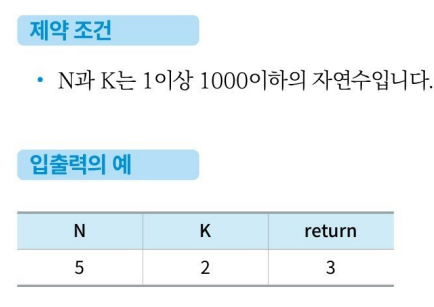

In [5]:
from collections import deque

def solution(n,k):
    queue = deque(range(1,n+1))

    while len(queue) > 1: # deque에 하나의 요소가 남을 떄까지
        for _ in range(k-1):
            queue.append(queue.popleft()) # k번쨰 요소를 찾기 위해 앞에서부터 제거하고 뒤에 추가
        
            queue.popleft()
        return queue[0]
    
print(solution(5,2))
        


3


#### 시간 복잡도 분석하기

n은 전체 사람수 k는 제거된 사람의 번호이다. k-1번 pop하고 1번 push하는 동작을 n번 반복하므로 O(n*K)이다.

## **07-3 합격자가 되는 모의 테스트** 

#### **기능 개발**

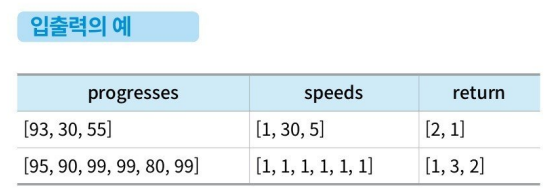

#### 문제 분석하고 풀기

문제에 주어진 기능의 개발속도는 모두 다르며, 뒤의 기능은 앞의 기능이 배포될 떄 함께 배포되어야 한다는 조건이 있다. 작업 순서는 유지하되 앞의 기능이 뒤의 기능보다 먼저 완료되어야 한다는 거다. 이를 보고 큐를 떠올릴 수 있어야 한다.

In [13]:
import math
def solution(progresses, speeds):
  answer = [ ]
  n = len(progresses)
  # ➊ 각 작업의 배포 가능일 계산
  days_left = [math.ceil((100 - progresses[i]) / speeds[i]) for i in range(n)] # [7, 3, 9]

  count = 0  # ➋ 배포될 작업의 수 카운트
  max_day = days_left[0]  # ➌ 현재 배포될 작업 중 가장 늦게 배포될 작업의 가능일

  for i in range(n):
    if days_left[i] <= max_day:  # ➍ 배포 가능일이 가장 늦은 배포일보다 빠르면
      count += 1
    else:  # ➎ 배포 예정일이 기준 배포일보다 느리면
      answer.append(count)
      count = 1
      max_day = days_left[i]

  answer.append(count)  # ➏ 마지막으로 카운트된 작업들을 함께 배포
  return answer

[2, 1]


➍ 기준 배포일보다 배포일이 빠르거나 같은 기능은 기준 배포일과 같이 배포할 것이므로 cnt +1을 한다.  
➎ 기능의 배포 가능일이 기준 기능 배포일보다 늦으면 같이 배포하면 안되므로 한 번에 배포할 수 있는 기능의 수가 저장된 cnt를 answer에 append()함수로 추가한다. 이후 나머지 작업의 배포일도 구해야 하므로 cnt는 다시 1로 초기화 한다.  


#### 시간복잡도 분석하기

N은 progesses의 길이이다. day_left리스트를 생성하기 위한 시간 복잡도는 O(N), day_left의 각 요소를 한 번씩 순화할 때의 시간 복잡도는 O(N)

#### **카드뭉치**

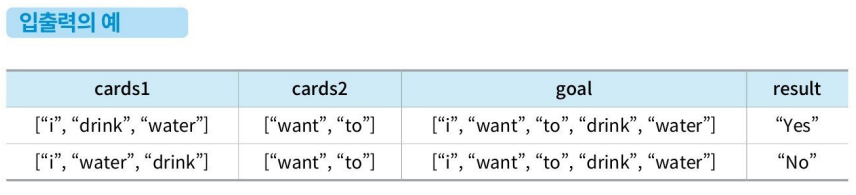

#### **문제 분석하고 풀기**

- cards1과 cards2는 무조건 앞부터 사용해야 한다.
- 순서를 뒤바꿀 수 없음


In [ ]:
from collections import deque

def solution(cards1, cards2, goal):
  # cards와 goal을 deque로 변환
  cards1 = deque(cards1)
  cards2 = deque(cards2)
  goal = deque(goal)

  # ➊ goal의 문자열을 순차적으로 순회
  while goal:
    if cards1 and cards1[0] == goal[0]:  # ➋ card1의 front와 일치하는 경우
      cards1.popleft()
      goal.popleft()
    elif cards2 and cards2[0] == goal[0]:  # ➌ card2의 front와 일치하는 경우
      cards2.popleft()
      goal.popleft()
    else:
      break  # 일치하는 원소를 찾지 못했으므로 종료

  return "Yes" if not goal else "No"  # ➍ goal이 비었으면 “Yes” 아니면 “No”를 반환

#### **시간 복잡도 분석하기**

card1과 card2의 길이는 N이고 goal의 길이는 M이다, 이를 각각 deque로 변환하기 위한 시간 복잡도는O(N+M)이다.